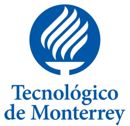

# Maestría en Inteligencia Artificial Aplicada
## Curso: Inteligencia Artificial y Aprendizaje Automático
### Tecnológico de Monterrey
### Prof José Antonio Cantoral Ceballos
# Activity 1b
## Fully Connected Deep Neural Networks

## Team 18
Team members

> - Francisco Javier Parga García A01794380
> - Matthias Sibrian Illescas A01794249
> - Enrique Hernández García A01793727
> - Alejandro Tomás Mackey A01164338

# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


In [1]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline


In [2]:
DATA_PATH = 'asl_data'
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Importar Images

In [4]:
y_train = np.array(train_df['label'])
y_val = np.array(valid_df['label'])
del train_df['label']
del valid_df['label']
x_train = train_df.values.astype(np.float32)
x_val = valid_df.values.astype(np.float32)

In [5]:
x_val.shape

(7172, 784)

In [6]:
def split_val_test(x, y, pct=0.5, shuffle=True):
    '''
    This function splits a dataset (x, y) into validation and test sets.
    The validation set size is determined by the pct parameter, which is the percentage of the original dataset size.
    The shuffle parameter controls whether to randomly select the validation set or take the first pct fraction of the dataset.
    The function returns four arrays: x_validation, y_validation, x_test, and y_test.
    '''

    # Calculate the number of indexes to select for the validation set
    number_of_indexes_to_select = int(x.shape[0]*pct)

    if shuffle:
        # Randomly select indexes for the validation set without replacement
        indexes_list = np.random.choice(range(x.shape[0]),
                                        number_of_indexes_to_select, 
                                        replace=False)
    else:
        # Select the first pct fraction of indexes for the validation set
        indexes_list = list(range(number_of_indexes_to_select))

    # Find the complement of the indexes list, which are the indexes for the test set
    complement = [index for index in range(x.shape[0]) if index not in indexes_list]

    # Slice the x and y arrays according to the indexes lists
    x_validation = x[indexes_list]
    y_validation = y[indexes_list]

    x_test = x[complement]
    y_test = y[complement]
        
    # Return the validation and test sets
    return x_validation, y_validation, x_test, y_test

In [7]:
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)

In [8]:
### The following

alphabet=list(string.ascii_lowercase)
alphabet.remove('j')
alphabet.remove('z')
print(len(alphabet))

24


To review the alphabet with the classes, the class and letter are mapped based on the data from the train and the alphabet

In [9]:
alphabet_dictionary = dict(zip(np.unique(y_train), alphabet))
alphabet_dictionary

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'k',
 10: 'l',
 11: 'm',
 12: 'n',
 13: 'o',
 14: 'p',
 15: 'q',
 16: 'r',
 17: 's',
 18: 't',
 19: 'u',
 20: 'v',
 21: 'w',
 22: 'x',
 23: 'y'}

### Normalise

Normalisation is a common technique to scale the data to have zero mean and unit variance, which can improve the performance of some machine learning algorithms.

In [10]:
def normalise(x_mean, x_std, x_data):
    '''
    This function normalises the data (x_data) by subtracting the mean (x_mean) and dividing by the standard deviation (x_std).
    The function returns a new array with the normalised data.
    '''

    # Perform element-wise subtraction and division
    return (x_data - x_mean) / x_std

In [11]:
x_mean = x_train.mean()
x_std = x_train.std()

x_train = normalise(x_mean, x_std, x_train)
x_val = normalise(x_mean, x_std, x_val)
x_test = normalise(x_mean, x_std, x_test)

### Graficar muestras

Since this an image problem, it would be good to have a tool to display the date we are dealing with.

In [12]:
def plot_number(image):
    '''
    This function plots a single image (image) as a grayscale figure with a size of 3 by 3 inches.
    The function squeezes the image to remove any singleton dimensions, such as the color channel for grayscale images.
    The function uses the matplotlib library to create and display the figure.
    '''

    # Create a figure with a specified size
    plt.figure(figsize=(3,3))
    # Plot the image as grayscale, squeezing any singleton dimensions
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    # Turn off the axis labels and ticks
    plt.axis('off')
    # Show the figure on the screen
    plt.show()

La imagen seleccionada representa la letra: c


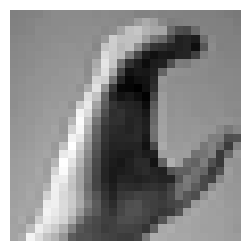

In [13]:
rnd_idx = np.random.randint(len(y_test))
print(f'La imagen seleccionada representa la letra: {alphabet_dictionary.get(y_test[rnd_idx])}')
plot_number(x_test[rnd_idx].reshape(28,28))

### Ecuaciones para nuestro modelo

$$z^1 = W^1 X + b^1$$

>  The previus equation computes the input to the hidden layer from the original input data X. Here, W^1 is a matrix of weights that connects each input feature to each hidden unit, b^1 is a vector of biases that adds an offset to each hidden unit, and z^1 is a vector of linear combinations of the input features.



$$a^1 = ReLU(z^1) $$

> This one computes the output of the hidden layer by applying an activation function to the input z^1. ReLU is a common activation function that returns the positive part of its argument, i.e., ReLU(x) = max(0, x). This function introduces non-linearity to the model and allows it to learn complex patterns from the data.



$$z^2 = W^2 a^1 + b^2$$

> The third equation computes the input to the output layer from the output of the hidden layer a^1. Here, W^2 is a matrix of weights that connects each hidden unit to each output unit, b^2 is a vector of biases that adds an offset to each output unit, and z^2 is a vector of linear combinations of the hidden units.

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$

> This equation computes the output of the output layer by applying a softmax function to the input z^2. Here, \hat{y} is a vector of probabilities that sum up to one, and each element \hat{y}_k represents the probability of the input X belonging to class k. The softmax function normalizes the input z_2 by exponentiating each element and dividing by the sum of all exponentials. This function is useful for multi-class classification problems where the output can belong to one of several possible classes.

$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$

> The fifth equation computes the loss function for a single training example (X_i, y_i). Here, y_i is a vector of true labels that indicates which class the input X_i belongs to, and \hat{y}_i is a vector of predicted probabilities from the output layer. The loss function is called cross-entropy loss and it measures how well the model predicts the true labels. The loss function is negative because we want to minimize it, and it is equal to the negative logarithm of the predicted probability for the true class.


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

> The final equation computes the average loss function over all training examples. Here, num_samples is the number of training examples, w and b are the parameters of the model (the weights and biases), and \mathcal{J}(w, b) is called the cost function or objective function. The goal of training a neural network is to find the optimal values of w and b that minimize this cost function.

### Funciones adicionales

#### Mini batches

A mini-batch is a subset of the dataset that is used to update the model parameters in gradient descent algorithms

In [14]:
def create_minibatches(mb_size, x, y, shuffle = True):
    '''
    This function creates mini-batches of data from the original dataset (x, y).
    The mb_size parameter determines the size of each mini-batch.
    The shuffle parameter controls whether to randomly shuffle the dataset before creating the mini-batches.
    The function returns a generator object that yields tuples of (x_mini, y_mini) for each mini-batch.
    '''

    # Check that the number of samples in x and y are equal
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras'
    # Get the total number of samples in the dataset
    total_data = x.shape[0]
    if shuffle: 
        # Create an array of indexes from 0 to total_data - 1
        idxs = np.arange(total_data)
        # Randomly shuffle the indexes
        np.random.shuffle(idxs)
        # Reorder x and y according to the shuffled indexes
        x = x[idxs]
        y = y[idxs]  
    # Loop over the dataset with a step size of mb_size
    for i in range(0, total_data, mb_size):
        # Yield a tuple of (x_mini, y_mini) for each mini-batch
        yield (x[i:i+mb_size], y[i:i+mb_size])

To make sure the mini batches generator, here we test a 32 batch

In [15]:
mini_batch = create_minibatches(32, x_train, y_train, shuffle = True)
x_batch, y_batch = [batch for batch in mini_batch][0]
x_batch.shape, y_batch.shape

((32, 784), (32,))

## Nuestra clase Linear, ReLU y Sequential

Using numpy, we create a  subclass of the NumPy ndarray class, which is a multidimensional array object that can store homogeneous data of fixed size

In [16]:
class np_tensor(np.ndarray):
    '''
    Custom subclass from a ndarray
    '''
    def __new__(cls, input_array, name="np_tensor"):
        # Input array is an already formed ndarray instance
        # We first cast to be our class type
        obj = np.asarray(input_array).view(cls)
        # Add the new attribute to the created instance
        obj.name = name
        # Finally, we must return the newly created object
        return obj

The view method takes an optional dtype or type argument that specifies the data-type or the type of the returned view. Here we are passing the type argument as np_tensor, which means that the view will have the same data-type as a, but it will be an instance of np_tensor instead of ndarray. This allows you to customize your array type with some added or modified functionality.

In [22]:
a = np.array([0, 0])
b = a.view(np_tensor)

In [23]:
type(a)

numpy.ndarray

In [24]:
type(b)

__main__.np_tensor

In [25]:
a == b

np_tensor([ True,  True])

In [26]:
a is b

False

###  Clase Linear

A linear layer is a basic building block of neural networks that performs a linear transformation of the input data

In [27]:
class Linear():
    def __init__(self, input_size, output_size):
        '''
        This method initializes the parameters of the linear layer using Kaiming He initialization.
        The input_size parameter is the number of features in the input data.
        The output_size parameter is the number of features in the output data.
        The self.W attribute is a weight matrix of shape (output_size, input_size) that connects the input and output features.
        The self.b attribute is a bias vector of shape (output_size, 1) that adds an offset to the output features.
        The self.W and self.b attributes are instances of np_tensor, which is a subclass of np.ndarray with some added functionality.
        '''
        # Initialize the weight matrix using Kaiming He initialization
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)
        # Initialize the bias vector with zeros
        self.b = (np.zeros((output_size, 1))).view(np_tensor)
        
    def __call__(self, X): # esta el foward de la clase lineal
        '''
        This method performs the forward pass of the linear layer, i.e., it computes the output of the layer given the input data.
        The X parameter is a matrix of shape (input_size, batch_size) that contains the input data for a batch of samples.
        The method returns a matrix Z of shape (output_size, batch_size) that contains the output data for the same batch of samples.
        '''
        # Compute the linear transformation Z = W @ X + b
        Z = self.W @ X + self.b
        return Z
        
    def backward(self, X, Z):
        '''
        This method performs the backward pass of the linear layer, i.e., it computes the gradients of the parameters and the input data given the output data and its gradients.
        The X parameter is a matrix of shape (input_size, batch_size) that contains the input data for a batch of samples.
        The Z parameter is a matrix of shape (output_size, batch_size) that contains the output data for the same batch of samples.
        The Z.grad attribute is a matrix of shape (output_size, batch_size) that contains the gradients of the output data with respect to some loss function.
        The method updates the following attributes:
            - X.grad: a matrix of shape (input_size, batch_size) that contains the gradients of the input data with respect to the same loss function.
            - W.grad: a matrix of shape (output_size, input_size) that contains the gradients of the weight matrix with respect to the same loss function.
            - b.grad: a vector of shape (output_size, 1) that contains the gradients of the bias vector with respect to the same loss function.
        The method does not return anything, but modifies the attributes in-place.
        '''
        # Compute the gradient of the input data using the chain rule: X.grad = W.T @ Z.grad
        X.grad = self.W.T @ Z.grad
        # Compute the gradient of the weight matrix using the chain rule: W.grad = Z.grad @ X.T
        self.W.grad = Z.grad @ X.T
        # Compute the gradient of the bias vector using the chain rule: b.grad = sum(Z.grad, axis = 1, keepdims=True)
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True)

### Clase ReLU

The ReLU activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance

In [28]:
class ReLU():
    def __call__(self, Z):
        '''
        This method performs the forward pass of the ReLU activation function, i.e., it computes the output of the function given the input data.
        The Z parameter is a matrix or vector that contains the input data, which can be either positive or negative.
        The method returns a matrix or vector with the same shape as Z that contains the output data, which is either Z or zero depending on the sign of Z.
        '''
        # Use the numpy maximum function to compare Z with zero and return the larger value element-wise
        return np.maximum(0, Z)
        
    def backward(self, Z, A):
        '''
        This method performs the backward pass of the ReLU activation function, i.e., it computes the gradient of the input data given the output data and its gradient.
        The Z parameter is a matrix or vector that contains the input data, which can be either positive or negative.
        The A parameter is a matrix or vector that contains the output data, which is either Z or zero depending on the sign of Z.
        The A.grad attribute is a matrix or vector that contains the gradient of the output data with respect to some loss function.
        The method updates the following attribute:
            - Z.grad: a matrix or vector that contains the gradient of the input data with respect to the same loss function.
        The method does not return anything, but modifies the attribute in-place.
        '''
        # Copy the gradient of the output data to the gradient of the input data
        Z.grad = A.grad.copy()
        # Set the gradient of the input data to zero where Z is negative or zero
        Z.grad[Z <= 0] = 0

### Clase Sequential

A sequential model is a type of neural network that consists of a linear stack of layers, where each layer has one input and one output

In [29]:
class Sequential_layers():
    def __init__(self, layers):
        '''
        This method initializes the sequential model with a list of layers.
        The layers parameter is a list that contains objects of type Linear or ReLU, which are custom classes that implement linear and activation layers respectively.
        The self.layers attribute stores the list of layers in the model.
        The self.x attribute stores the input or output data for each layer.
        The self.outputs attribute stores a dictionary that maps each layer name to its output data.
        '''
        self.layers = layers
        self.x = None
        self.outputs = {}
    def __call__(self, X):
        '''
        This method performs the forward pass of the sequential model, i.e., it computes the output of the model given the input data.
        The X parameter is a matrix or vector that contains the input data for a batch of samples.
        The method returns a matrix or vector that contains the output data for the same batch of samples.
        The method also updates the self.outputs dictionary with the output data for each layer.
        '''
        # Set the input data as self.x
        self.x = X 
        # Store the input data as the output of layer 0
        self.outputs['l0'] = self.x
        # Loop over the layers in the model
        for i, layer in enumerate(self.layers, 1):
            # Call each layer on self.x and update self.x with the output
            self.x = layer(self.x)
            # Store the output data as the output of layer i
            self.outputs['l'+str(i)]=self.x
        # Return the final output data
        return self.x
    def backward(self):
        '''
        This method performs the backward pass of the sequential model, i.e., it computes the gradients of the parameters and the input data for each layer given the output data and its gradients.
        The method does not take any parameters, but assumes that the output data and its gradients are stored in the self.outputs dictionary.
        The method updates each layer with its gradients by calling its backward method.
        '''
        # Loop over the layers in reverse order
        for i in reversed(range(len(self.layers))):
            # Call each layer's backward method with its input and output data from the self.outputs dictionary
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)])
    def update(self, learning_rate = 1e-3):
        '''
        This method updates the parameters of each linear layer in the model using gradient descent.
        The learning_rate parameter is a positive scalar that controls the step size of gradient descent.
        The method does not return anything, but modifies the parameters in-place.
        '''
        # Loop over the layers in the model
        for layer in self.layers:
            # Skip if the layer is not a linear layer
            if isinstance(layer, ReLU): continue
            # Update each parameter by subtracting its gradient times the learning rate
            layer.W = layer.W - learning_rate * layer.W.grad
            layer.b = layer.b - learning_rate * layer.b.grad
    def predict(self, X):
        '''
        This method predicts the class label for each sample in the input data using the sequential model.
        The X parameter is a matrix or vector that contains the input data for a batch of samples.
        The method returns a vector that contains the predicted class label for each sample, which is obtained by taking the index of the maximum value in the output vector.
        '''
        # Perform a forward pass on X and get the output vector
        output = self.__call__(X)
        # Return the index of the maximum value in each row as a vector
        return np.argmax(output)

### Cost Function

 The softmax cross entropy loss function is a common loss function for multiclass classification problems, where the output can belong to one of several possible classes

In [30]:
def softmaxXEntropy(x, y):
    '''
    This function computes the softmax cross entropy loss and its gradient given the input scores and the true labels.
    The x parameter is a matrix of shape (n_classes, batch_size) that contains the raw scores (logits) for each class and each sample in a batch.
    The y parameter is a vector of shape (batch_size,) that contains the true labels for each sample in a batch, encoded as integers from 0 to n_classes - 1.
    The function returns a tuple of (preds, cost), where preds is a matrix of shape (n_classes, batch_size) that contains the predicted probabilities for each class and each sample, and cost is a scalar that contains the average loss value for the batch.
    The function also updates the following attribute:
        - x.grad: a matrix of shape (n_classes, batch_size) that contains the gradient of the input scores with respect to the loss function.
    '''

    # Get the batch size from the shape of x
    batch_size = x.shape[1]
    # Apply the exponential function to each element of x
    exp_scores = np.exp(x)
    # Normalize the exp_scores by dividing by the sum of exp_scores along each column
    probs = exp_scores / exp_scores.sum(axis = 0)
    # Copy the probs matrix to preds
    preds = probs.copy()
    # Costo
    # Select the predicted probabilities that correspond to the true labels using advanced indexing
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    # Compute the negative log of y_hat and sum over all samples, then divide by batch size to get the average loss
    cost = np.sum(-np.log(y_hat)) / batch_size
    # Calcular gradientes
    # Subtract 1 from the predicted probabilities that correspond to the true labels using advanced indexing
    probs[y.squeeze(), np.arange(batch_size)] -= 1 #dl/dx
    # Copy the probs matrix to x.grad
    x.grad = probs.copy()
    
    # Return the preds and cost values
    return preds, cost

### Loop de entrenamiento

The training loop is a process that iterates over the training data and updates the model parameters using gradient descent

In [31]:
def train(model, epochs, mb_size=128, learning_rate = 1e-3):
    '''
    This function trains a neural network model on the training data and evaluates it on the validation data.
    The model parameter is an instance of Sequential_layers, which is a custom class that implements a sequential model of linear and activation layers.
    The epochs parameter is an integer that specifies the number of times to loop over the entire training data.
    The mb_size parameter is an integer that specifies the size of each mini-batch of data.
    The learning_rate parameter is a positive scalar that controls the step size of gradient descent.
    The function returns a dictionary that contains two lists: costo and accuracy, which store the average loss and accuracy values for each epoch on the validation data.
    '''

    # Initialize two empty lists to store the cost and accuracy values
    costo_list = []
    acc_list = []
    # Loop over the number of epochs
    for epoch in range(epochs):
        # Loop over the mini-batches of data using a custom generator function
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)):
            # Perform a forward pass on the model with the input data transposed and casted to np_tensor
            scores = model(x.T.view(np_tensor))
            # Compute the softmax cross entropy loss and its gradient with the output scores and the true labels
            _, cost = softmaxXEntropy(scores, y)
            # Perform a backward pass on the model to compute the gradients of the parameters
            model.backward()
            # Update the parameters of the model using gradient descent
            model.update(learning_rate)

        # Compute the accuracy of the model on the validation data using a custom function
        acc = accuracy(x_val, y_val, mb_size) 
        
        # Append the cost and accuracy values to their respective lists
        costo_list.append(cost.tolist())
        acc_list.append(acc.tolist())
        
        # Print the epoch number, cost, and accuracy values
        print(f'Epoca {epoch}, costo: {np.round(cost,4)}, accuracy: {np.round(acc,4)}')
        
    # Create a dictionary that contains the cost and accuracy lists
    train_results = {'costo':costo_list, 'accuracy':acc_list} 
    # Return the dictionary
    return train_results

The accuracy metric is used to measure the performance of a classification model by comparing the predicted labels and the true labels

In [32]:
def accuracy(x, y, mb_size):
    '''
    This function computes the accuracy of a classification model on a given dataset.
    The x parameter is a matrix or vector that contains the input data for a batch of samples.
    The y parameter is a vector of shape (batch_size,) that contains the true labels for each sample in a batch, encoded as integers from 0 to n_classes - 1.
    The mb_size parameter is an integer that specifies the size of each mini-batch of data.
    The function returns a scalar that contains the accuracy value, which is the fraction of correctly classified samples over the total number of samples.
    '''

    # Initialize two variables to store the number of correct and total predictions
    correct = 0
    total = 0
    # Loop over the mini-batches of data using a custom generator function
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        # Perform a forward pass on the model with the input data transposed and casted to np_tensor
        pred = model(x.T.view(np_tensor))
        # Count the number of correct predictions by comparing the index of the maximum value in each column of pred with the corresponding element in y
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())
        # Count the total number of predictions by adding the number of columns in pred
        total += pred.shape[1]
    # Compute the accuracy by dividing the number of correct predictions by the total number of predictions
    return correct/total

### Create your model and train it

- We create an instance of the Sequential_layers class, which is a custom class that implements a sequential model of linear and activation layers. A sequential model is a type of neural network that consists of a linear stack of layers, where each layer has one input and one output.
- The Sequential_layers class takes a list of layers as an argument, and stores them in the self.layers attribute. The layers are instances of the Linear or ReLU classes, which are custom classes that implement linear and activation layers respectively. A linear layer performs a linear transformation of the input data, and an activation layer applies a non-linear function to the input data.
- The first layer in the list is a Linear layer with the ´x_train´ shape of the pictures 28x28 = 784 input features and 101 output features. This means that the input data for the model should have 784 features (e.g., pixels in an image).
- The second layer in the list is a ReLU layer, which applies the ReLU function to the output of the first layer. The ReLU function returns the positive part of its argument, i.e., ReLU(x) = max(0, x). This function introduces non-linearity to the model and allows it to learn complex patterns from the data.
- The third layer in the list is another Linear layer with 101 input features and 237 output features. This means that it takes the output of the second layer as its input.
- The fourth layer in the list is another ReLU layer, which applies the ReLU function to the output of the third layer. The fifth and final layer in the list is another Linear layer with 237 input features and len(alphabet_dictionary) = 24 output features. This means that it takes the output of the fourth layer as its input, and produces an output vector with len(alphabet_dictionary) elements. This vector represents the raw scores (logits) for each possible class in the classification problem.

In [33]:
model = Sequential_layers([
    Linear(x_train.shape[1], 101), 
    ReLU(), 
    Linear(101, 237), 
    ReLU(), 
    Linear(237, len(alphabet_dictionary))
])

- 512 to the variable mb_size, which stands for mini-batch size
> The mini-batch size determines how many samples are used to compute the loss and gradients in each iteration of gradient descent. A larger mini-batch size can speed up the training process, but it can also increase the memory requirements and reduce the generalization ability of the model. A smaller mini-batch size can improve the generalization ability of the model, but it can also slow down the training process and increase the variance of the gradients.
- The value 1e-4 (which is equivalent to 0.0001) to the variable learning_rate, which stands for learning rate.
> The learning rate is a positive scalar that controls the step size of gradient descent. A larger learning rate can make gradient descent converge faster, but it can also cause overshooting or divergence. A smaller learning rate can make gradient descent converge more stably, but it can also cause underfitting or slow convergence.
- The value 23 to the variable epochs, which stands for epochs.
> The number of epochs determines how many times gradient descent loops over all mini-batches in the dataset. A larger number of epochs can make gradient descent find a better solution, but it can also cause overfitting or wasting computational resources. A smaller number of epochs can make gradient descent save computational resources, but it can also cause underfitting or premature stopping.

In [34]:
mb_size = 512
learning_rate = 1e-4
epochs = 23

train_results = train(model, epochs, mb_size, learning_rate)

Epoca 0, costo: 1.0843, accuracy: 0.5455
Epoca 1, costo: 0.5521, accuracy: 0.6553
Epoca 2, costo: 0.3175, accuracy: 0.6927
Epoca 3, costo: 0.1884, accuracy: 0.7164
Epoca 4, costo: 0.1322, accuracy: 0.72
Epoca 5, costo: 0.0958, accuracy: 0.7359
Epoca 6, costo: 0.083, accuracy: 0.7434
Epoca 7, costo: 0.0619, accuracy: 0.7526
Epoca 8, costo: 0.0492, accuracy: 0.7627
Epoca 9, costo: 0.0474, accuracy: 0.7602
Epoca 10, costo: 0.0396, accuracy: 0.7658
Epoca 11, costo: 0.0312, accuracy: 0.7613
Epoca 12, costo: 0.0278, accuracy: 0.7699
Epoca 13, costo: 0.0229, accuracy: 0.7724
Epoca 14, costo: 0.0246, accuracy: 0.7747
Epoca 15, costo: 0.0169, accuracy: 0.7764
Epoca 16, costo: 0.0175, accuracy: 0.7786
Epoca 17, costo: 0.0175, accuracy: 0.7744
Epoca 18, costo: 0.0171, accuracy: 0.783
Epoca 19, costo: 0.0161, accuracy: 0.7825
Epoca 20, costo: 0.0143, accuracy: 0.7836
Epoca 21, costo: 0.0129, accuracy: 0.7839
Epoca 22, costo: 0.0116, accuracy: 0.7861


After the training of 23 epoch an accuracy of 0.78 was achieved. This means, the model can predict 78% of the time the correct letter in the image from sing language.

### Plot training results

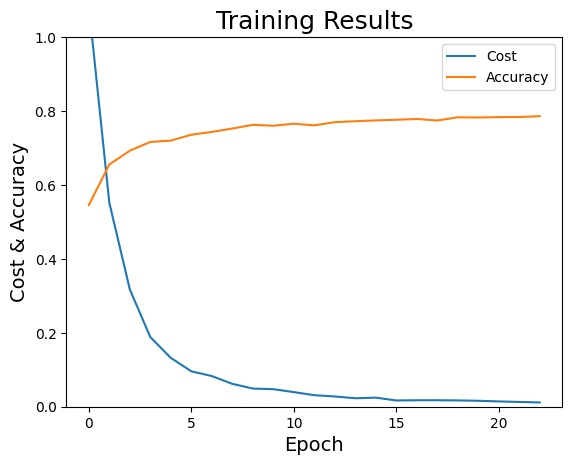

In [38]:
# Convert the cost list to a NumPy array
loss_arr = np.array(train_results['costo'])
# Convert the accuracy list to a NumPy array
acc_arr = np.array(train_results['accuracy'])

# Plot the cost array with a label 'Cost'
plt.plot(loss_arr, label = 'Cost')
# Plot the accuracy array with a label 'Accuracy'
plt.plot(acc_arr, label = 'Accuracy')
# Create a legend for the plot
plt.legend()

# Get the current axes object of the plot
axes = plt.gca()

# Set the lower and upper limits of the y-axis to 0 and 1
axes.set_ylim(0,1)
# Set the label of the x-axis to 'Epoch' with a font size of 14
axes.set_xlabel("Epoch", fontsize=14)
# Set the label of the y-axis to 'Cost & Accuracy' with a font size of 14
axes.set_ylabel("Cost & Accuracy", fontsize=14)
# Set the title of the plot to 'Training Results' with a font size of 18
axes.set_title('Training Results', fontsize=18)

# Display the plot on the screen
plt.show()

### Test your model on Random data from your test set

To test the performance of the inferences, we take a random sample from the test subset and perform a prediction:

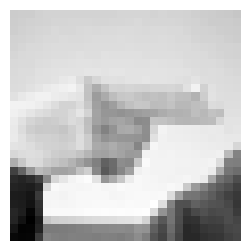

el valor predicho es: h el valor real es:h


In [39]:
idx = np.random.randint(len(y_test))
plot_number(x_test[idx].reshape(28,28))
pred = model.predict(x_test[idx].reshape(-1, 1))
print(f'el valor predicho es: {alphabet[pred]} el valor real es:{alphabet[y_test[idx]]}')